# Table of Contents
* [Learning Objectives:](#Learning-Objectives:)
* [Animations](#Animations)


# Learning Objectives:

After completion of this module, learners should be able to:

* construct more advanced `matplotlib` figures (e.g., logarithmic plots, animations, etc.)
* explain and use backends to customize figure output (e.g., to files, animations, interactive windows, etc.)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Animations

Matplotlib also includes a simple API for generating animations for sequences of figures. With the `FuncAnimation` function, we can generate a movie file from sequences of figures. The function takes the following arguments: 

* `fig`, a figure canvas, 
* `func`, a function that we provide which updates the figure, 
* `init_func`, a function we provide to setup the figure, 
* `frame`, the number of frames to generate, and 
* `blit`, which tells the animation function to only update parts of the frame which have changed (for smoother animations):

    def init():
        # setup figure

    def update(frame_counter):
        # update figure for new frame

    anim = animation.FuncAnimation(fig, update, init_func=init, frames=200, blit=True)

    anim.save('animation.mp4', fps=30) # fps = frames per second

To use the animation features in matplotlib we first need to import the module `matplotlib.animation`:

In [6]:
from matplotlib import animation

In [7]:
# solve the ode problem of the double compound pendulum again
from scipy.integrate import odeint
g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]   
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * np.cos(x1-x2) * x4)/(16 - 9 * np.cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * np.cos(x1-x2) * x3)/(16 - 9 * np.cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * np.sin(x1-x2) + 3 * (g/L) * np.sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * np.sin(x1-x2) + (g/L) * np.sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [np.pi/2, np.pi/2, 0, 0]  # initial state
t = np.linspace(0, 10, 250) # time coordinates
x = odeint(dx, x0, t)    # solve the ODE problem

Generate an animation that shows the positions of the pendulums as a function of time:

NOTE: To generate the movie file, we need to have either `ffmpeg` or `avconv` installed. Install it on Ubuntu using:

    $ sudo apt-get install ffmpeg

or (newer versions):

    $ sudo apt-get install libav-tools

On OS X, try: 

    $ sudo port install ffmpeg

In [8]:
!ffmpeg

'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.


RuntimeError: The init_func must return a sequence of Artist objects.

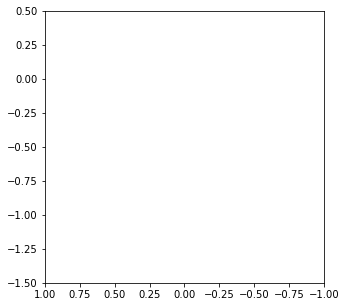

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)

def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])

def update(n): 
    # n = frame counter
    # calculate the positions of the pendulums
    x1 = + L * np.sin(x[n, 0])
    y1 = - L * np.cos(x[n, 0])
    x2 = x1 + L * np.sin(x[n, 1])
    y2 = y1 - L * np.cos(x[n, 1])
    
    # update the line data
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])

anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(t), blit=True)

# anim.save can be called in a few different ways, some which might or might not work
# on different platforms and with different versions of matplotlib and video encoders
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'], writer=animation.FFMpegWriter())
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
anim.save('animation.mp4', fps=20, writer="ffmpeg", codec="libx264")
#anim.save('animation.mp4', fps=20, writer="avconvert", codec="libx264")

plt.close(fig)

In [ ]:
from IPython.display import HTML
VIDEO_TAG = """<video controls>
 <source src="{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""
video_tag = VIDEO_TAG.format('animation.mp4')
HTML(video_tag)

In [ ]:
# If that doesn't work, try calling to shell
!open animation.mp4